In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score

# Step 1: Data Collection
# Assuming we have a list of policies and their corresponding labels
df = pd.read_csv('dataset_testv2.csv', delimiter = ',')

policies = df['original_text']
labels = df['acceptable']

# Step 2: Data Preprocessing and Labeling
# No preprocessing needed as an example, but we can add text cleaning if required

# Step 3: Feature Extraction
vectorizer = TfidfVectorizer(decode_error='replace', encoding='utf-8')
X = vectorizer.fit_transform(policies.values.astype('U'))

# Step 4: Model Training
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=31)

# Cross Validation
neighbors = range(1,20)
cv_scores = []
for maxNeighbor in neighbors:
    kt = KNeighborsClassifier(n_neighbors = maxNeighbor,weights='uniform',leaf_size=30)
    scores = cross_val_score(kt, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())
maxNeigbor_best = neighbors[np.argmax(cv_scores)]
print('cv_scores:', cv_scores)
print('maxNeighbor_best:',maxNeigbor_best)

classifier = KNeighborsClassifier(n_neighbors=maxNeigbor_best,weights='uniform',leaf_size=30)
trained_classifier=classifier.fit(X_train, y_train)
predicted_label = trained_classifier.predict(X_test)

#Evaluation of Trained Model                                    
print('Confusion Matrix')
cfm= confusion_matrix(y_test,predicted_label)
print(cfm)
print('---------')

print('Classification Accuracy')
accuracy=accuracy_score(y_test,predicted_label)
print(accuracy)
print('---------')

print('Precision Score')
precision11 = precision_score(y_test, predicted_label,average='macro')
print(precision11)
print('---------')

print('Recall Score')
recall = recall_score(y_test,predicted_label,average='macro')
print(recall)
print('---------')

print('F1 Score')
F1 = f1_score(y_test,predicted_label,average='macro')
print(F1)
print('---------')

#Prediction
new_policy = "We are committed to ensuring that the information you provide is secure, and as such we use commercially reasonable endeavors to keep personal information collected through the Site secure. Such endeavours include requesting your username and password to verify your identity before you a grand access to your account."
X_new_feed = vectorizer.transform([new_policy])
X_new_feed = vectorizer.transform([new_policy])
feed_predicted_label = classifier.predict(X_new_feed)
print("Predicted Label:", feed_predicted_label[0])

#Phrase Patterns

# Get the feature names from TfidfVectorizer
feature_names = vectorizer.get_feature_names_out()

# Get the TF-IDF matrix for your new data
new_data_tfidf_matrix = X_new_feed.toarray()

# Find the most important features (words) for each data point
important_features = []
for j in range(len(feature_names)):
    if new_data_tfidf_matrix[0, j] > 0:
        important_features.append((feature_names[j], new_data_tfidf_matrix[0, j]))
    
# Print the important features for each data point
print(f"Important words or phrases that causes this prediction and TF scores:")
for feature, score in sorted(important_features, key=lambda x: x[1], reverse=True):
    print(f"{feature}: {score}")


cv_scores: [0.6950187969924813, 0.7072055137844612, 0.7089285714285715, 0.7158208020050124, 0.7247180451127819, 0.724592731829574, 0.7247180451127819, 0.7298558897243108, 0.7369674185463658, 0.7352130325814537, 0.7333646616541353, 0.7405075187969925, 0.7299498746867169, 0.7422932330827068, 0.743984962406015, 0.7511278195488722, 0.7334273182957394, 0.744016290726817, 0.7316416040100251]
maxNeighbor_best: 16
Confusion Matrix
[[48 24]
 [11 59]]
---------
Classification Accuracy
0.7535211267605634
---------
Precision Score
0.7622013477639371
---------
Recall Score
0.7547619047619047
---------
F1 Score
0.7520331287731377
---------
Predicted Label: 1
Important words or phrases that causes this prediction and TF scores:
secure: 0.39070578328679656
ensuring: 0.2702263438399613
verify: 0.24888013159513334
commercially: 0.24126133867037966
identity: 0.22431789681297995
username: 0.21593233614929913
your: 0.20877549374511037
to: 0.20711899451918253
such: 0.1968850123960427
keep: 0.195352891643398

In [84]:
#Prediction1
new_policy = "We collect and use your personal information for as long as reasonably required in order to provide the a Services, which may include -developing and testing new or updated products and features without your permission; -for internal record keeping and for marketing."
X_new_feed = vectorizer.transform([new_policy])
feed_predicted_label = classifier.predict(X_new_feed)
print("Predicted Label:", feed_predicted_label[0])

#Prediction2
new_policy2 = "When you upload Posted Content, you automatically grant Vervoe an exclusive, royalty-free, perpetual, irrevocable, worldwide licence to use, reproduce, modify, adapt and publish the content in that Posted Content, including a right to sub-licence as necessary for Vervoe to provide and maintain the Technology. You waive any moral rights you may have in the Posted Content."
X_new_feed2 = vectorizer.transform([new_policy2])
feed_predicted_label2 = classifier.predict(X_new_feed2)
print("Predicted Label:", feed_predicted_label2[0])

#Prediction3
new_policy3 = "You agree that your Posted Content is not rude, offensive, racist, or inappropriate, and does not contain material that is contrary to any law applicable to you."
X_new_feed3 = vectorizer.transform([new_policy3])
feed_predicted_label3 = classifier.predict(X_new_feed3)
print("Predicted Label:", feed_predicted_label3[0])

#Prediction4
new_policy4 = "We are committed to ensuring that the information you provide is secure, and as such we use commercially reasonable endeavors to keep personal information collected through the Site secure. Such endeavours include requesting your username and password to verify your identity before you a grand access to your account."
X_new_feed4 = vectorizer.transform([new_policy4])
feed_predicted_label4 = classifier.predict(X_new_feed4)
print("Predicted Label:", feed_predicted_label4[0])


Predicted Label: 0
Predicted Label: 0
Predicted Label: 1
Predicted Label: 1


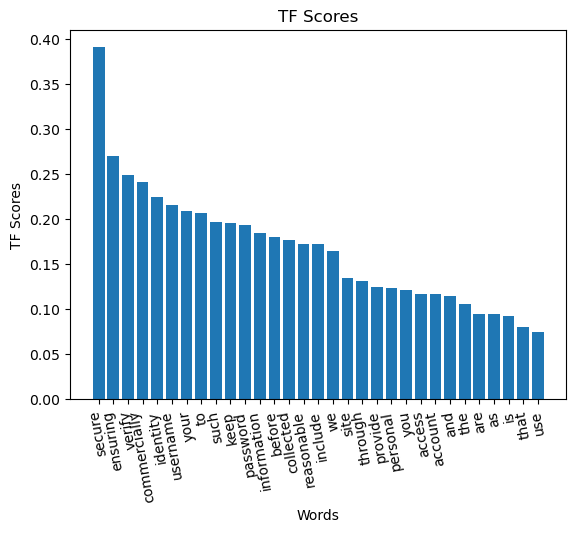

In [85]:
plot_df = pd.DataFrame(important_features)

# Sort DataFrame by ratios descendingly
plot_df.sort_values(by=1, ascending=False, inplace=True)

# Create the bar plot
plt.bar(plot_df[0], plot_df[1])

# Set plot labels and title
plt.xlabel('Words')
plt.ylabel('TF Scores')
plt.title('TF Scores')

# Rotating x-axis labels for better readability (optional)
plt.xticks(rotation=100)

# Display the plot
plt.show()